**Часть 1**

Размерность

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(" Вывод: actual_productivity - имеет размерность в % (% производительности, выполненной рабочими)")

 Вывод: actual_productivity - имеет размерность в % (% производительности, выполненной рабочими)


In [18]:
df = pd.read_csv('archive.zip')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Наличие пустых значений

In [79]:
print(df.isnull().any())
print()
print("Вывод: пустые значения есть в ячейке wip. Удалим данный столбец")

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

Вывод: пустые значения есть в ячейке wip. Удалим данный столбец


In [80]:
df = pd.read_csv('archive.zip')
df_2 = df.drop(['wip'], axis=1)
df_2

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


Матрица корреляции

<ipython-input-81-18efd566fa76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatr = df_2.corr()


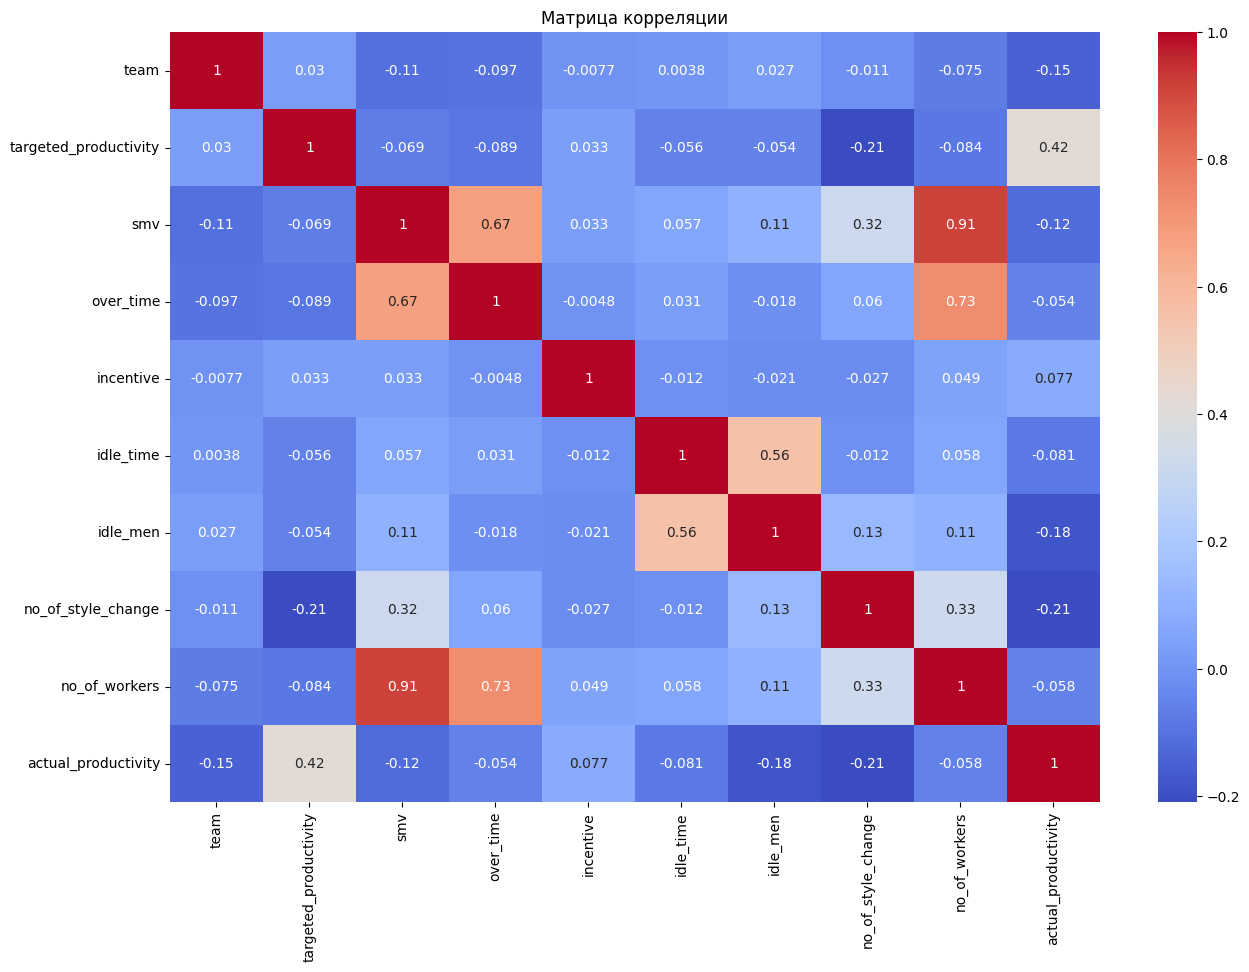

Вывод: наиболее высокая корреляция наблюдается у smv и no_of_workers (0.91), over_time и no_of_workers (0.73), smv и over_time (0.67),idle_time и idle_men (0.56). Корреляция остальных параметров мала, так как они слабо связанны между собой или вообще не связаны.


In [81]:
plt.figure(figsize=(15,10))
corrmatr = df_2.corr()
sns.heatmap(corrmatr, annot=True, cmap= 'coolwarm')
plt.title('Матрица корреляции')
plt.show()
print("Вывод: наиболее высокая корреляция наблюдается у smv и no_of_workers (0.91), over_time и no_of_workers (0.73), smv и over_time (0.67),idle_time и idle_men (0.56). Корреляция остальных параметров мала, так как они слабо связанны между собой или вообще не связаны.")

boxplot для исследования выбросов

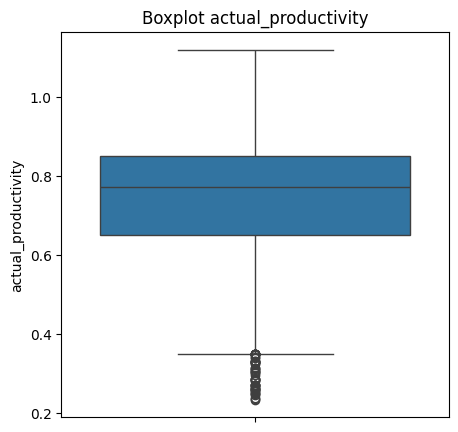

Вывод:средняя производительность является равной приблизительно 0.8, верхний квартиль находится в промежутке от 0.8 до 0.9, нижний квартиль находится в промежутке от 0.6 до 0.7, выборсы имеются приблизительно где-то ниже 0.4


In [82]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_2['actual_productivity'])
plt.title('Boxplot actual_productivity')
plt.show()
print("Вывод:средняя производительность является равной приблизительно 0.8, верхний квартиль находится в промежутке от 0.8 до 0.9, нижний квартиль находится в промежутке от 0.6 до 0.7, выборсы имеются приблизительно где-то ниже 0.4")

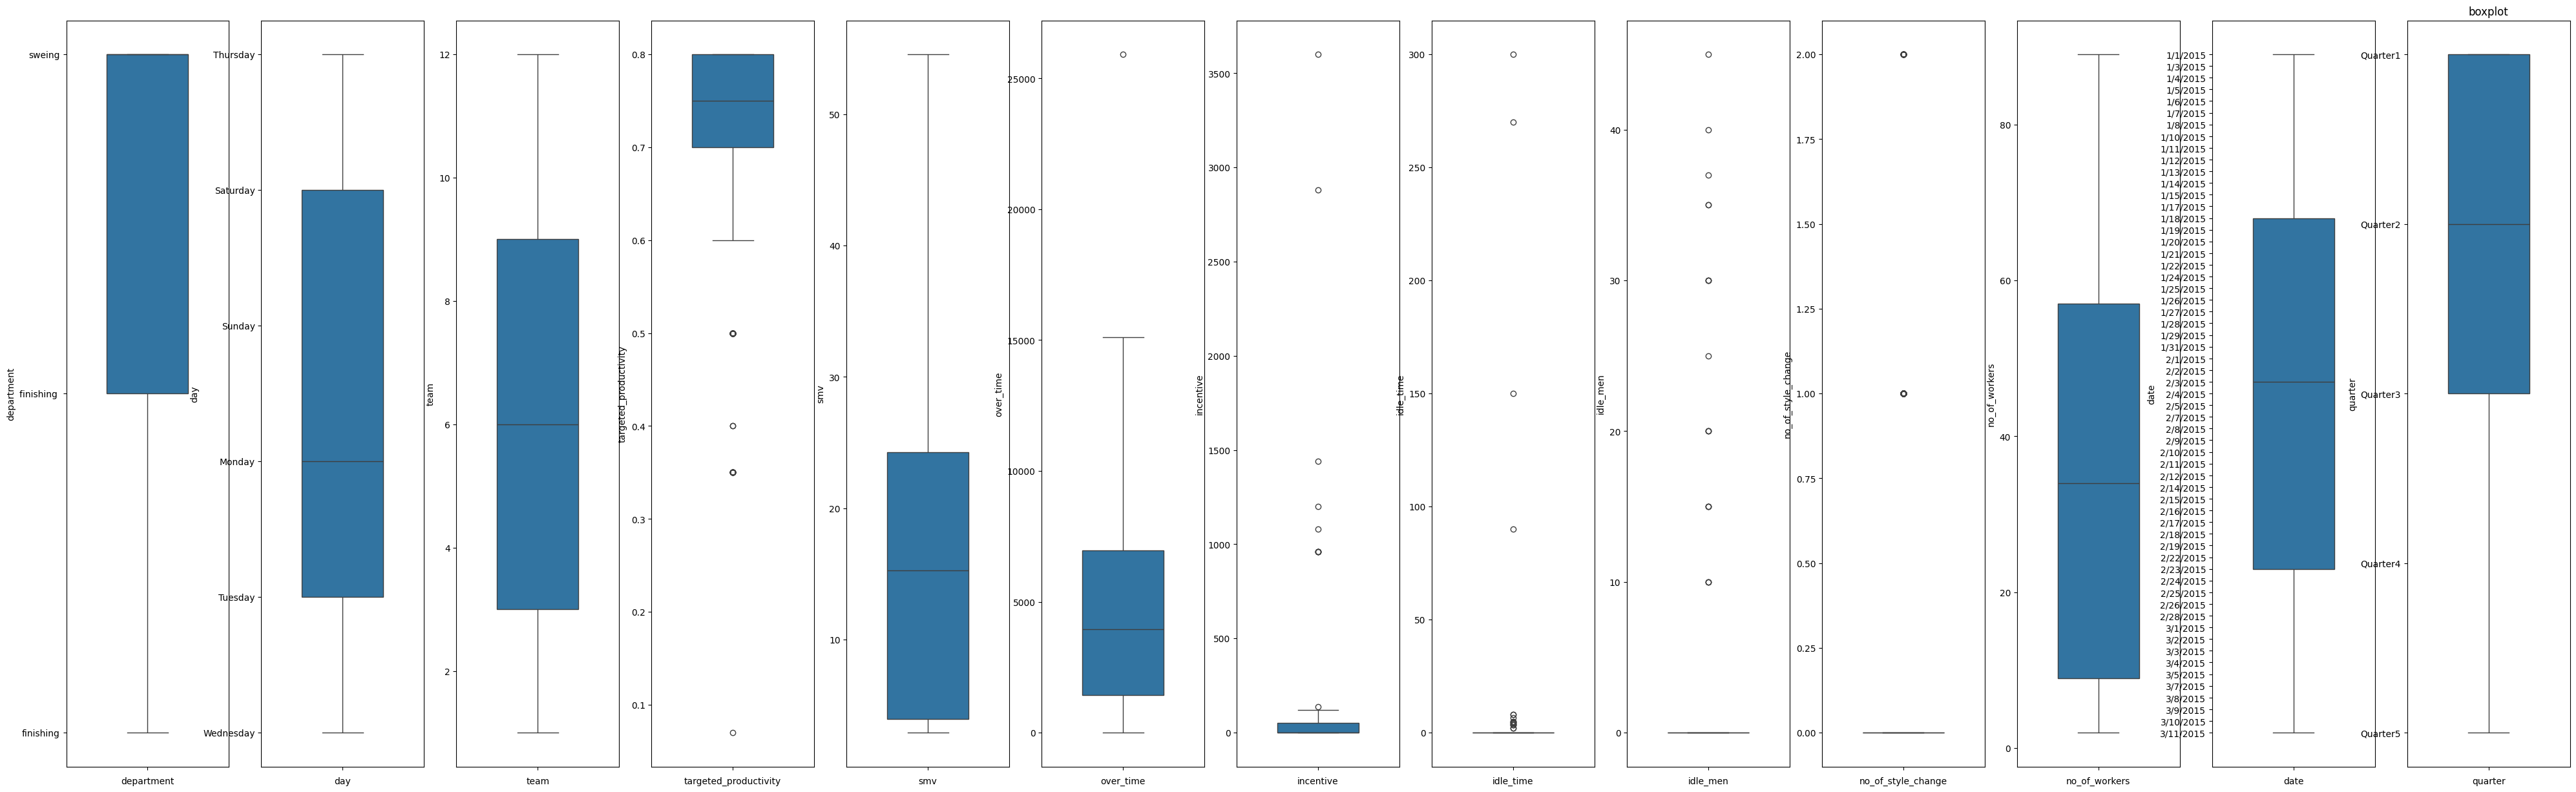

Вывод: Самый максимальный верхний квартиль у department,targeted_productivity, quarter; Самый минимальный нижний квартиль у incentive; выбросы имеются (targeted_productivity,wip, over_time,incentive, idle_time, idle_men,no_of_style_change)


In [85]:
fig, axes = plt.subplots(1, 13, figsize=(50,15))
sns.boxplot(df_2["department"], ax=axes[0], width=0.5)
sns.boxplot(df_2["day"], ax=axes[1], width=0.5)
sns.boxplot(df_2["team"], ax=axes[2], width=0.5)
sns.boxplot(df_2["targeted_productivity"], ax=axes[3], width=0.5)
sns.boxplot(df_2["smv"], ax=axes[4], width=0.5)
sns.boxplot(df_2["over_time"], ax=axes[5], width=0.5)
sns.boxplot(df_2["incentive"], ax=axes[6], width=0.5)
sns.boxplot(df_2["idle_time"], ax=axes[7], width=0.5)
sns.boxplot(df_2["idle_men"], ax=axes[8], width=0.5)
sns.boxplot(df_2["no_of_style_change"], ax=axes[9], width=0.5)
sns.boxplot(df_2["no_of_workers"], ax=axes[10], width=0.5)
sns.boxplot(df_2["date"], ax=axes[11], width=0.5)
sns.boxplot(df_2["quarter"], ax=axes[12], width=0.5)
axes[0].set_xlabel("department")
axes[1].set_xlabel("day")
axes[2].set_xlabel("team")
axes[3].set_xlabel("targeted_productivity")
axes[4].set_xlabel("smv")
axes[5].set_xlabel("over_time")
axes[6].set_xlabel("incentive")
axes[7].set_xlabel("idle_time")
axes[8].set_xlabel("idle_men")
axes[9].set_xlabel("no_of_style_change")
axes[10].set_xlabel("no_of_workers")
axes[11].set_xlabel("date")
axes[12].set_xlabel("quarter")
plt.title('boxplot')
plt.show()
print("Вывод: Самый максимальный верхний квартиль у department,targeted_productivity, quarter; Самый минимальный нижний квартиль у incentive; выбросы имеются (targeted_productivity,wip, over_time,incentive, idle_time, idle_men,no_of_style_change)")

**Часть 2**

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

x = df_2.drop(columns=['actual_productivity', 'date',	'quarter',	'department', 'day'] )
y = df_2['actual_productivity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Test dataset size: {x_test.shape}, {y_test.shape}')

model = LinearRegression()
model.fit(x_train, y_train)
print('Веса всех признаков (w1, ..., w13): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Train dataset size: (837, 9), (837,)
Test dataset size: (360, 9), (360,)
Веса всех признаков (w1, ..., w13):  [-8.88148277e-03  7.34607306e-01 -7.01153595e-03 -3.28491560e-06
  5.43551684e-05  4.07815188e-05 -8.91134659e-03 -4.16335301e-02
  3.74350289e-03]
Свободный коэффицент уравнения w0: 0.25104936957354507


In [89]:
features = x_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
7,-0.044079,no_of_style_change
0,-0.008519,team
2,-0.008168,smv
6,-0.008151,idle_men
3,-0.000005,over_time
4,0.000047,incentive
5,0.000404,idle_time
8,0.004378,no_of_workers
1,0.683974,targeted_productivity


In [91]:
print("y='targeted_productivity'*0.680997 + 'no_of_workers'*0.003327 + 'incentive'*0.000049 + 'over_time'*-0.000004	+ 'idle_time'*-0.000026	+ 'smv'*-0.006469	+ 'team'*-0.007838 + 'idle_men'*-0.008783	+ 'no_of_style_change'*-0.046692 + 0.30031248588306925")
print("Вывод: targeted_productivity - значащий признак, no_of_style_change - тоже значащий, но слабее, остальные практически ничего не значат ")

y='targeted_productivity'*0.680997 + 'no_of_workers'*0.003327 + 'incentive'*0.000049 + 'over_time'*-0.000004	+ 'idle_time'*-0.000026	+ 'smv'*-0.006469	+ 'team'*-0.007838 + 'idle_men'*-0.008783	+ 'no_of_style_change'*-0.046692 + 0.30031248588306925
Вывод: targeted_productivity - значащий признак, no_of_style_change - тоже значащий, но слабее, остальные практически ничего не значат 


In [92]:
y_pred = model.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.10029459612712253
Mean Squared Error: 0.018417065941147195
R2 score: 0.33015586954923015


In [94]:
print("Вывод: среднее отклонение, как и квадратичное отклонение близко к нулю, что считается хорошим резултатом. R2 так же является низкой")

Вывод: среднее отклонение, как и квадратиное отклонение близко к нулю, что считается хорошим резултатом. R2 так же является низкой


**Часть 3**

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


mmsc = MinMaxScaler()
x_norm = mmsc.fit_transform(x_train)
x_norm_test = mmsc.fit_transform(x_test)

print(f'Train dataset size: {x_norm.shape}, {y_train.shape}')
print(f'Test dataset size: {x_norm_test.shape}, {y_test.shape}')

model = LinearRegression()
model.fit(x_norm, y_train)

print('Веса всех признаков (w1, ..., w13): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)


Train dataset size: (837, 9), (837,)
Test dataset size: (360, 9), (360,)
Веса всех признаков (w1, ..., w13):  [-0.10552286  0.47768938 -0.39296502 -0.12131568  0.25139129  0.27883966
 -0.42431087 -0.07982871  0.35536023]
Свободный коэффицент уравнения w0: 0.3394803287719425


LinearRegression()

In [149]:
features = x_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))


   Coefficient               features
6    -0.424311               idle_men
2    -0.392965                    smv
3    -0.121316              over_time
0    -0.105523                   team
7    -0.079829     no_of_style_change
4     0.251391              incentive
5     0.278840              idle_time
8     0.355360          no_of_workers
1     0.477689  targeted_productivity


In [151]:
print("Вывод: y='targeted_productivity'*0.477689 + 'no_of_workers'*0.355360 + 'incentive'* 0.251391  + 'over_time'*-0.121316 	+ 'idle_time'*0.278840 	+ 'smv'*-0.392965 	+ 'team'*-0.105523  + 'idle_men'*-0.424311   	+ 'no_of_style_change'*-0.079829  + 0.3394803287719425 ")

Вывод: y='targeted_productivity'*0.477689 + 'no_of_workers'*0.355360 + 'incentive'* 0.251391  + 'over_time'*-0.121316 	+ 'idle_time'*0.278840 	+ 'smv'*-0.392965 	+ 'team'*-0.105523  + 'idle_men'*-0.424311   	+ 'no_of_style_change'*-0.079829  + 0.3394803287719425 


In [152]:
y_pred = model.predict(x_norm_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.1207558541434024
Mean Squared Error: 0.027070954197938722
R2 score: 0.19327665874533173


In [153]:
print("Вывод: больших изменений не наблюдается,среднее отклонение и квадратичное отклонение немного увеличились, R2 стало меньше ")

Вывод: больших изменений не наблюдается,среднее отклонение и квадратичное отклонение немного увеличились, R2 стало меньше 
